Linear regression , Polynomial regression , Ridge regression, Lasso regression, Logistics regression ,Decision tree , cross validation

Linear Regression

In [8]:
import pandas as pd

In [ ]:
from sklearn.datasets import load_boston

In [9]:
from sklearn.datasets import fetch_california_housing

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df=fetch_california_housing()

In [12]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [13]:
dataset=pd.DataFrame(df.data)

In [14]:
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
dataset.columns=df.feature_names

In [16]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [17]:
# independent features (x) and dependent features(y)
X=dataset
y=df.target

In [18]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [19]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [20]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
7061,4.1312,35.0,5.882353,0.975490,1218.0,2.985294,33.93,-118.02
14689,2.8631,20.0,4.401210,1.076613,999.0,2.014113,32.79,-117.09
17323,4.2026,24.0,5.617544,0.989474,731.0,2.564912,34.59,-120.14
10056,3.1094,14.0,5.869565,1.094203,302.0,2.188406,39.26,-121.00
15750,3.3068,52.0,4.801205,1.066265,1526.0,2.298193,37.77,-122.45
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,1753.0,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96


In [21]:
# x_train standardise fit transfrom 
# x_test transfrom

# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

In [24]:
X_train

array([[ 0.13350629,  0.50935748,  0.18106017, ..., -0.01082519,
        -0.80568191,  0.78093406],
       [-0.53221805, -0.67987313, -0.42262953, ..., -0.08931585,
        -1.33947268,  1.24526986],
       [ 0.1709897 , -0.36274497,  0.07312833, ..., -0.04480037,
        -0.49664515, -0.27755183],
       ...,
       [-0.49478713,  0.58863952, -0.59156984, ...,  0.01720102,
        -0.75885816,  0.60119118],
       [ 0.96717102, -1.07628333,  0.39014889, ...,  0.00482125,
         0.90338501, -1.18625198],
       [-0.68320166,  1.85715216, -0.82965604, ..., -0.0816717 ,
         0.99235014, -1.41592345]])

In [25]:
# scaler.inverse_transform(x_train)
# to inverse the transform

In [26]:
from sklearn.linear_model import LinearRegression

# cross validation
from sklearn.model_selection import cross_val_score

In [27]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [28]:
# cv=5 same model will train with different data so 5 diff. accuracy will come

mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [29]:
np.mean(mse)

-0.5268253746355748

In [30]:
# prediction test data

reg_pred=regression.predict(X_test)

In [31]:
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133])

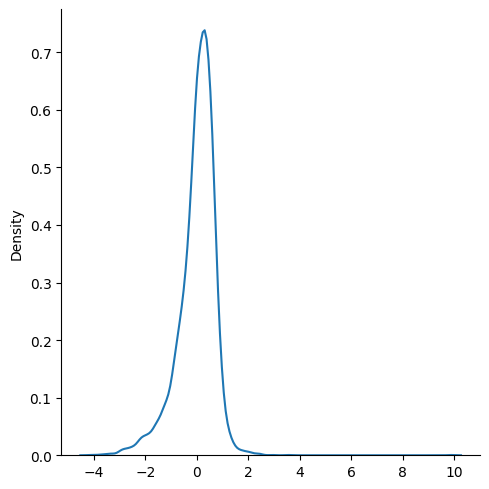

In [32]:
import seaborn as sns

sns.displot(reg_pred-y_test,kind='kde')

In [33]:
from sklearn.metrics import r2_score


In [34]:
score=r2_score(reg_pred,y_test)

In [35]:
score

0.3451339380943961

Polynomial Regression

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [3]:
X=6 * np.random.rand(200,1) - 3
y=0.8* X**2 + 0.9 * X + 2 + np.random.rand(200,1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
lr=LinearRegression()

In [6]:
lr.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

-0.008648991038207932

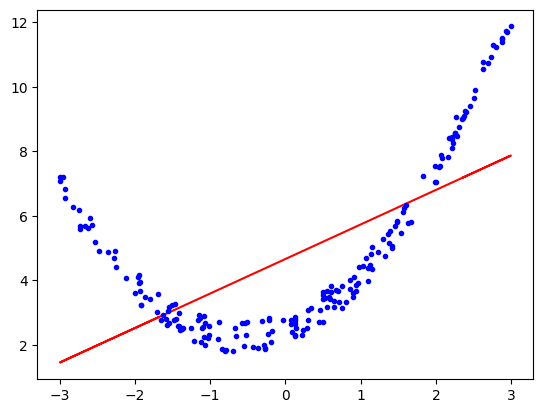

In [9]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,"b.")
plt.show()

In [ ]:
# applying polynomial lr 

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)
print(X_train[0])
print(X_train_trans[0]) # [x^0 ,x^1,x^2]

[-1.68837534]
[ 1.         -1.68837534  2.85061129]


In [11]:
lr = LinearRegression()
lr.fit(X_train_trans,y_train)

LinearRegression()

In [12]:
y_pred = lr.predict(X_test_trans)

In [13]:
r2_score(y_test,y_pred)

0.9838633003102847

In [14]:
lr.coef_

array([[0.        , 0.90153045, 0.78579311]])

In [15]:
lr.intercept_

array([2.53522604])

Ridge Regression Algorithm

In [1]:
from sklearn.linear_model import Ridge
from sklearn.model_selection  import GridSearchCV

In [4]:
ridge_regressor=Ridge()

In [5]:
ridge_regressor

Ridge()

In [ ]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [37]:
print(ridgecv.best_params_)

{'alpha': 5}


In [38]:
print(ridgecv.best_score_)

-0.5268179966861515


In [39]:
ridge_pred=ridgecv.predict(X_test)

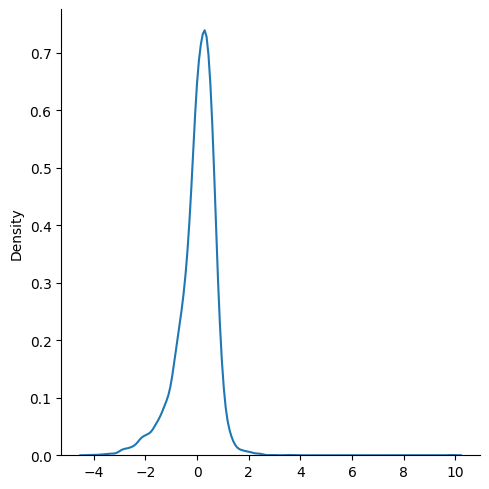

In [40]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [41]:
score=r2_score(ridge_pred,y_test)
score

0.34383945441404484

Lasso Regression

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso=Lasso()

In [44]:
parameters={'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [46]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-1.3400019579636542


In [48]:
lasso_pred=lassocv.predict(X_test)

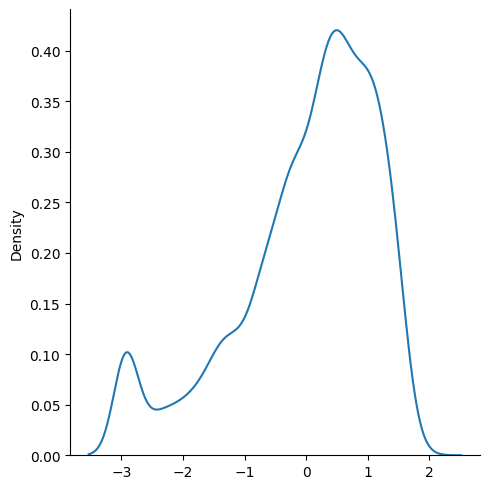

In [49]:
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

Logistics Regression

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [7]:
df=df[df['species']!='setosa']

In [8]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [9]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [15]:
# dividing dataset into independent and dependent feature

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [16]:
X

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4
51,6.4,3.2,4.5,1.5
52,6.9,3.1,4.9,1.5
53,5.5,2.3,4.0,1.3
54,6.5,2.8,4.6,1.5
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
y

50     0
51     0
52     0
53     0
54     0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 100, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [27]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver='saga')

In [31]:
from sklearn.model_selection import GridSearchCV

parameter = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300],'l1_ratio': [0, 0.5, 1]}

In [32]:
classifier_regressor=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5)

In [33]:
classifier_regressor.fit(X_train,y_train)

/home/diya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/diya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/diya/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/diya/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/diya/.local/lib/python3.8/site-packages/sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'l1_ratio': [0, 0.5, 1], 'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [34]:
print(classifier_regressor.best_params_)

{'C': 1, 'l1_ratio': 0, 'max_iter': 200, 'penalty': 'l1'}


In [35]:
print(classifier_regressor.best_score_)

1.0


In [36]:
# prediction

y_pred = classifier_regressor.predict(X_test)

In [42]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1])

In [37]:
# accuracy score
from sklearn.metrics import accuracy_score,classification_report

In [38]:
score = accuracy_score(y_pred,y_test)
print(score)

0.88


In [39]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25



In [41]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,0.553855,0.828479,0.593709,0.494305
sepal_width,0.553855,1.000000,0.519802,0.566203,0.308080
petal_length,0.828479,0.519802,1.000000,0.823348,0.786424
petal_width,0.593709,0.566203,0.823348,1.000000,0.828129
species,0.494305,0.308080,0.786424,0.828129,1.000000


Decision Tree

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.datasets import load_iris

In [6]:
iris=load_iris()

In [7]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
df=sns.load_dataset('iris')

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# dividing dataset into independent and dependent features

X=df.iloc[:,:-1]
y=iris.target

In [12]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
# postpruning

treemodel=DecisionTreeClassifier()

In [18]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[3] <= 1.65\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[2] <= 4.95\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.25, 0.21428571428571427, 'x[3] <= 1.55\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.3333333333333333, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0

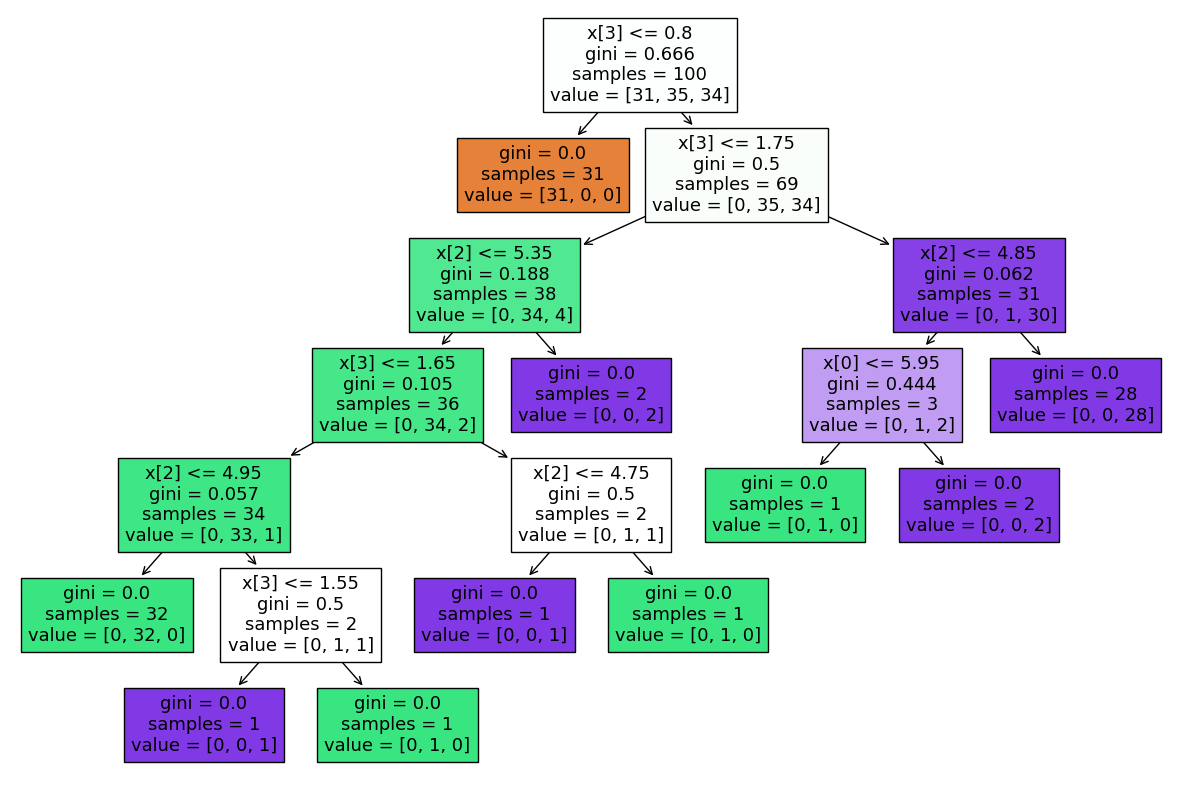

In [19]:
# gini range "0-0.5"

from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [20]:
# prediction
y_pred=treemodel.predict(X_test)

In [21]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [22]:
from sklearn.metrics import accuracy_score,classification_report


In [23]:
score=accuracy_score(y_pred,y_test)
print(score)

1.0


In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [35]:
# pre prunning

parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
    # 'ccp_alpha':[1,2,3,4,5,6,7]
}

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
treemodel = DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [38]:
cv.fit(X_train,y_train)

/home/diya/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diya/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diya/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/diya/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/diya/.local/lib/python

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [39]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [44]:
y_pred = cv.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score,classification_report

In [46]:
score=accuracy_score(y_pred,y_test)

In [47]:
score

0.92

In [48]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.84      1.00      0.91        16\n           1       1.00      0.79      0.88        19\n           2       0.94      1.00      0.97        15\n\n    accuracy                           0.92        50\n   macro avg       0.93      0.93      0.92        50\nweighted avg       0.93      0.92      0.92        50\n'

Cross Validation

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_california_housing


In [11]:
df=fetch_california_housing()

In [12]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [16]:
# dataset=pd.DataFrame(df.data)

In [17]:
# dataset

In [18]:
X=pd.DataFrame(df.data,columns=df.feature_names)
y=df.target

In [22]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [20]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()

In [21]:
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

In [23]:
y_pred= regressor.predict(X_test)

In [24]:
y_pred

array([0.421  , 0.521  , 5.00001, ..., 1.33   , 1.387  , 4.5    ])

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_pred,y_test)

In [26]:
score

0.5958970361896874

In [28]:
# hyperparameter tunning


parameter={
    'criterion':['squared_error','friedman_mse','absolute_error','poission'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5,6,7,8,10,11,12],
    'max_features':['auto','sqrt','log2']
}
regressor=DecisionTreeRegressor()

In [29]:
from sklearn.model_selection import GridSearchCV
regressorcv=GridSearchCV(regressor,param_grid=parameter,scoring="neg_mean_squared_error",cv=5)

In [30]:
regressorcv.fit(X_train,y_train)

/home/diya/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
660 fits failed out of a total of 1320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
330 fits failed with the following error:
Traceback (most recent call last):
  File "/home/diya/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/diya/.local/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/home/diya/.local/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/home/diya/.local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poission'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [31]:
regressorcv.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

In [32]:
y_pred= regressorcv.predict(X_test)

In [33]:
r2_score(y_pred,y_test)

0.5671740885220149